# Cyber Incidents Master.


Este dataset contiene información sobre incidentes de ciberseguridad, enfocándose en detalles sobre ataques que afectaron a diversas industrias, países y regiones

## Importación de librerías.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

: 

## Importacion e informacion del dataframe.

In [ ]:
df = pd.read_csv('data\CYBER INCIDENTS MASTER.csv', index_col=0)
df

,description,date,year,target_country,region,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,impact,tisafe_score,references,source_database,source_database_incident_id,date_uploaded
dnx_id,,,,,,,,,,,,,,,,,,
inc_knb_4282,['Cyber attack on a labor union in the United ...,2024-03-01 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Tech trade union confirms cyberatt...,KONBRIEFING,[],2024-04-29
inc_knb_4193,['Cyber attack on a university in the United K...,2024-02-20 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Cyber incident disrupts another UK...,KONBRIEFING,[],2024-04-29
inc_knb_4154,['DDoS attack on the website of the Ukrainian ...,2024-02-07 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Сайт МОН не працює внаслідок росій...,KONBRIEFING,[],2024-04-29
inc_knb_4104,['Cyber attack on a emergency service in Canad...,2024-01-24 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Des pirates s’en prennent aux serv...,KONBRIEFING,[],2024-04-29
inc_knb_4035,['Cyber attack on a it service provider in Ger...,2024-01-01 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Straubinger Firma bestätigt: Handw...,KONBRIEFING,[],2024-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inc_hmg_10629,Researchers from Cado Labs discover an updated...,2023-05-24 00:00:00,2023,[],[],[],Multiple Industries,[],Multiple organizations,Malware,?,[],[],[],https://thehackernews.com/2023/05/legion-malwa...,HACKMAGEDDON,[],2024-04-29
inc_hmg_10722,Researchers from Aqua Security reveal that the...,2023-11-03 00:00:00,2023,[],[],[],Multiple Industries,[],Multiple organizations,Vulnerability,Kinsing AKA Money Libra,[],[],[],https://www.bleepingcomputer.com/news/security...,HACKMAGEDDON,[],2024-04-29
inc_hmg_11019,Hampton-Newport News CSB is added to ALPHV/Bla...,2023-11-25 00:00:00,2023,US,[],US,Information and communication,[],Hampton-Newport News CSB,Malware,ALPHV a.k.a. BlackCat,[],[],[],https://www.databreaches.net/the-big-bad-black...,HACKMAGEDDON,[],2024-04-29


In [ ]:
df.describe(include='all')

: 

# Limpieza del dataset

Preprocessing tex and cleaning Data

In [21]:
import re
from datetime import datetime

# 1. Preprocessing Text and Cleaning Data

# Clean 'description' column by removing non-alphabet characters and convert text to lowercase
data['description_cleaned'] = data['description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).lower())

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check for missing values in key columns and replace empty lists or '[]' strings with NaN
columns_to_check = ['target_country', 'region', 'dnx_country', 'industry', 'type_of_attack', 'threat_source', 'malware', 'impact']
data[columns_to_check] = data[columns_to_check].replace(['[]', ''], pd.NA)

# Count missing values for each relevant column to evaluate data quality
missing_values = data[columns_to_check].isnull().sum()

# Display cleaned sample and missing values summary
data_cleaned_sample = data[['description', 'description_cleaned', 'date']].head()
data_cleaned_sample, missing_values



(                                         description  \
 0  ['Cyber attack on a labor union in the United ...   
 1  ['Cyber attack on a university in the United K...   
 2  ['DDoS attack on the website of the Ukrainian ...   
 3  ['Cyber attack on a emergency service in Canad...   
 4  ['Cyber attack on a it service provider in Ger...   
 
                                  description_cleaned       date  
 0  cyber attack on a labor union in the united ki... 2024-03-01  
 1  cyber attack on a university in the united kin... 2024-02-20  
 2  ddos attack on the website of the ukrainian mi... 2024-02-07  
 3  cyber attack on a emergency service in canada\... 2024-01-24  
 4  cyber attack on a it service provider in germa... 2024-01-01  ,
 target_country     8021
 region            32086
 dnx_country        8021
 industry           4472
 type_of_attack    20196
 threat_source     22306
 malware           33515
 impact            32658
 dtype: int64)

Basic Statistical Analysis

In [22]:
# 2. Basic Statistical Analysis

# Generate basic descriptive statistics for the 'year' column to see distribution of incidents over time
year_stats = data['year'].describe()

# Count frequency of incidents by type of attack and threat source, focusing on top 5 categories for each
attack_type_counts = data['type_of_attack'].value_counts().head(5)
threat_source_counts = data['threat_source'].value_counts().head(5)

# Count frequency of incidents by target country, focusing on top 5 countries
target_country_counts = data['target_country'].value_counts().head(5)

year_stats, attack_type_counts, threat_source_counts, target_country_counts


(count    34993.000000
 mean      2014.608693
 std        108.983085
 min          0.000000
 25%       2020.000000
 50%       2022.000000
 75%       2023.000000
 max       2024.000000
 Name: year, dtype: float64,
 type_of_attack
 Malware             4380
 Unknown             2285
 Vulnerability       1283
 Account Takeover    1162
 Targeted Attack      859
 Name: count, dtype: int64,
 threat_source
 ?                                          6741
 Multiple threat actors                      192
 LockBit 3.0                                 146
 Clop AKA Lace Tempest, TA505 and, FIN11     130
 Clop AKA Lace Tempest, TA505 and FIN11      106
 Name: count, dtype: int64,
 target_country
 ['USA']              6459
 US                   4257
 ['United States']    1613
 ['GBR']               734
 ['ITA']               414
 Name: count, dtype: int64)

In [23]:
# Checking unique values and data types in the columns that caused issues to identify any irregularities
attack_type_unique = data['type_of_attack'].unique()
threat_source_unique = data['threat_source'].unique()
target_country_unique = data['target_country'].unique()

attack_type_unique, threat_source_unique, target_country_unique


(array([<NA>, "['Disruption']",
        "['Hijacking with Misuse', 'Data theft & Doxing']",
        "['Ransomware', 'Hijacking with Misuse', 'Data theft & Doxing']",
        "['Hijacking with Misuse', 'Disruption']",
        "['Disruption', 'Ransomware']", "['Data theft']",
        "['Data theft', 'Hijacking with Misuse']",
        "['Data theft & Doxing']", 'Malware', 'Account Hijacking',
        'Vulnerability', 'Targeted Attack', 'Account hijacking',
        'Misconfiguration', 'Account Takeover', 'Unknown', 'DDoS',
        'DeepFake', 'Coordinated Inauthentic Behavior',
        "['Hijacking with Misuse']",
        "['Hijacking with Misuse', 'Disruption', 'Ransomware']",
        "['Hijacking without Misuse']", 'DNS hijacking',
        'Fake Social Accounts', 'Password sprying',
        "['Data theft', 'Hijacking with Misuse', 'Disruption', 'Ransomware']",
        'Defacement', 'Business Email Compromise',
        'Malicious Browser Extension', 'Malicious Script Injection',
        '

In [24]:
# Normalize columns by extracting individual values in cases where multiple values are enclosed in lists
# Define a function to clean list-like strings and normalize values
def clean_list_column(value):
    if pd.isna(value):
        return value
    # Remove brackets and quotes, then split by comma if there are multiple values
    value = re.sub(r"[\[\]']", "", value).strip()
    return value.split(", ") if "," in value else value

# Apply the function to 'type_of_attack', 'threat_source', and 'target_country' columns
data['type_of_attack'] = data['type_of_attack'].apply(clean_list_column)
data['threat_source'] = data['threat_source'].apply(clean_list_column)
data['target_country'] = data['target_country'].apply(clean_list_column)

# Re-attempt statistical analysis after normalization
attack_type_counts = data['type_of_attack'].explode().value_counts().head(5)
threat_source_counts = data['threat_source'].explode().value_counts().head(5)
target_country_counts = data['target_country'].explode().value_counts().head(5)

year_stats, attack_type_counts, threat_source_counts, target_country_counts


(count    34993.000000
 mean      2014.608693
 std        108.983085
 min          0.000000
 25%       2020.000000
 50%       2022.000000
 75%       2023.000000
 max       2024.000000
 Name: year, dtype: float64,
 type_of_attack
 Malware                  4380
 Unknown                  2285
 Hijacking with Misuse    1336
 Vulnerability            1283
 Disruption               1269
 Name: count, dtype: int64,
 threat_source
 ?                         6741
 Clop AKA Lace Tempest      310
 Multiple threat actors     193
 LockBit 3.0                146
 FIN11                      132
 Name: count, dtype: int64,
 target_country
 USA              6459
 US               4345
 United States    1821
 GBR               734
 ITA               414
 Name: count, dtype: int64)

In [25]:
# Redefine year_stats and recalculate statistical summaries
year_stats = data['year'].describe()

# Rerun analysis on the top categories for attack types, threat sources, and target countries
attack_type_counts = data['type_of_attack'].explode().value_counts().head(5)
threat_source_counts = data['threat_source'].explode().value_counts().head(5)
target_country_counts = data['target_country'].explode().value_counts().head(5)

year_stats, attack_type_counts, threat_source_counts, target_country_counts


(count    34993.000000
 mean      2014.608693
 std        108.983085
 min          0.000000
 25%       2020.000000
 50%       2022.000000
 75%       2023.000000
 max       2024.000000
 Name: year, dtype: float64,
 type_of_attack
 Malware                  4380
 Unknown                  2285
 Hijacking with Misuse    1336
 Vulnerability            1283
 Disruption               1269
 Name: count, dtype: int64,
 threat_source
 ?                         6741
 Clop AKA Lace Tempest      310
 Multiple threat actors     193
 LockBit 3.0                146
 FIN11                      132
 Name: count, dtype: int64,
 target_country
 USA              6459
 US               4345
 United States    1821
 GBR               734
 ITA               414
 Name: count, dtype: int64)

# SQL

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# 3. Basic NLP Processing
# Using CountVectorizer to find the most common terms in 'description_cleaned' for keyword analysis
vectorizer = CountVectorizer(stop_words='english', max_features=10)
description_matrix = vectorizer.fit_transform(data['description_cleaned'].dropna())

# Extract most common keywords
keywords = vectorizer.get_feature_names_out()
keywords_counts = description_matrix.sum(axis=0).A1  # Get counts of each keyword
common_keywords = dict(zip(keywords, keywords_counts))

common_keywords


{'access': np.int64(3192),
 'attack': np.int64(11808),
 'breach': np.int64(4050),
 'company': np.int64(4234),
 'cyber': np.int64(4450),
 'data': np.int64(8572),
 'group': np.int64(4815),
 'information': np.int64(4486),
 'ransomware': np.int64(8445),
 'researchers': np.int64(3890)}

In [27]:
pip install pandas matplotlib seaborn wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Realización de gráficos


<ipython-input-18-27d97ca88f51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')


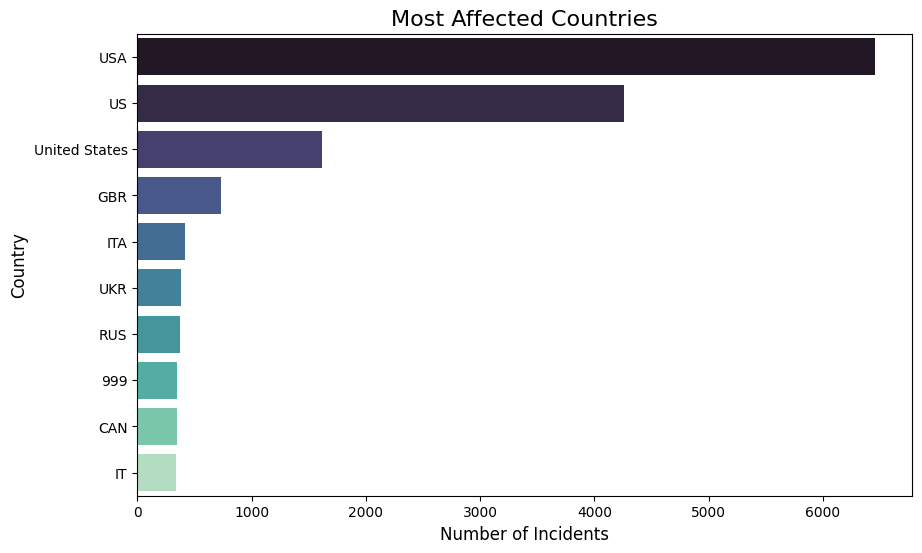

In [ ]:
# ---- Análisis 3: Distribución geográfica ----
country_counts = data['target_country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')
plt.title('Most Affected Countries', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()


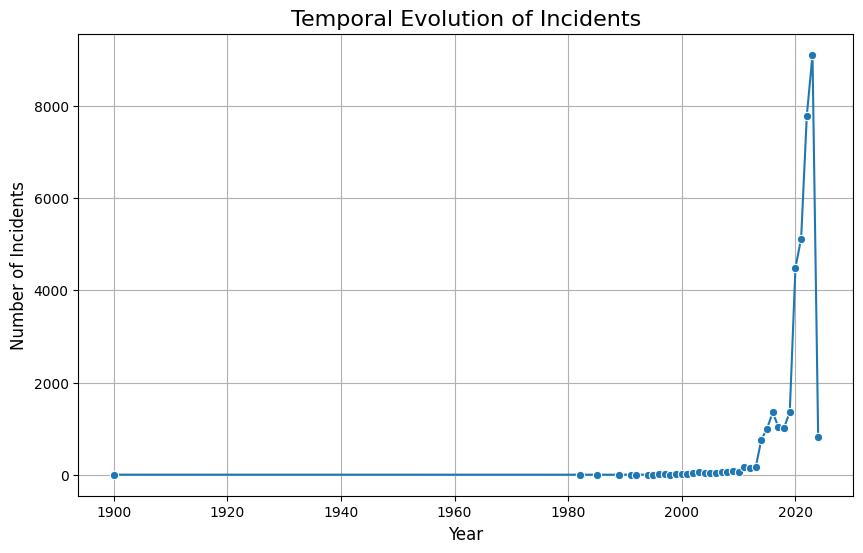

In [ ]:
# ---- Análisis 4: Evolución temporal ----
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year
yearly_counts = data['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Temporal Evolution of Incidents', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.show()

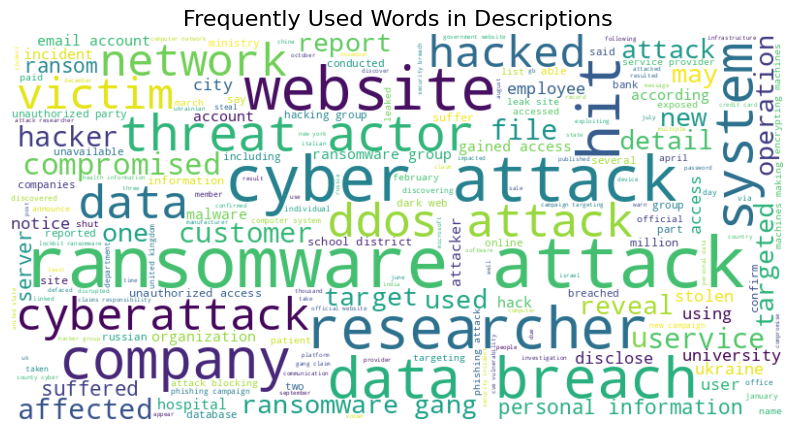

In [ ]:
# ---- Análisis 5: Palabras clave frecuentes ----
from wordcloud import WordCloud

description_text = ' '.join(data['description_cleaned'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(description_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequently Used Words in Descriptions', fontsize=16)
plt.show()
